In [11]:
import networkx as nx
import numpy as np
import matplotlib
matplotlib.use('TkAgg') 
#import matplotlib.pyplot as plt
#%matplotlib inline
#import egt
from evolution import Evolution, CoEvolution, StaticStrategyEvolution
from population import Population, DynamicPopulation
import game
import rule
import adapter
print(nx.__version__)
print(np.__version__)







3.1
1.24.4


In [12]:
# 生成网络
# G = ba(N, 5, 3, 1)
# G = nx.davis_southern_women_graph()
# G = nx.random_regular_graph(4, 1000)
# G = nx.convert_node_labels_to_integers(nx.grid_2d_graph(100, 100, periodic=True))
# G = nx.star_graph(10)
# G = nx.watts_strogatz_graph(1000, 5, 0.2)
G = nx.barabasi_albert_graph(1000, 3)
# G = nx.powerlaw_cluster_graph(1000, 10, 0.2)
# G = nx.convert_node_labels_to_integers(nx.davis_southern_women_graph())
# G = ["/../../DataSet/ASU/Douban-dataset/data/edges.csv", ',']
# G = {"path":"/../wechat/barabasi_albert_graph(5000,100)_adj.txt", "fmt":"adj"}
# G = "/../wechat/facebook.txt"

# 网络结构
p = Population(G)
# print nx.info(p)
# p.degree_distribution()

# 博弈类型
g = game.PDG(b=5)
# g = game.PGG(3)
# g = game.PGG2(3)

# 学习策略
# u = rule.BirthDeath()
u = rule.DeathBirth()
# u = rule.Fermi()
# u = rule.HeteroFermi(g.delta)

# 连接策略
a = adapter.Preference(3)

# 绘图参数
colors = 'bgrcmykw'
markers = '.,ov^v<>1234sp*hH+xDd|-'
lines = ['-', '--', '-.', ':']
fmt = ['bd-', 'ro--', 'g^-.', 'c+:', 'mx--', 'y*-.']

In [13]:
def once():
    e = Evolution(has_mut=True)
    e.set_population(p).set_game(g).set_rule(u)
    e.evolve(1000)
    e.show()
    # 分析节点最终fit和结构参数的关系
    # p.show_degree()
    # p.degree_distribution()


def lattice():
    l = 100
    def observe(s, f):
        plt.imshow(s.reshape((l, l)), interpolation='sinc', cmap='bwr')
        plt.show()
    G = nx.grid_2d_graph(l, l)
    # nx.draw(G, node_size=200, with_labels=True)
    # plt.show()
    p = Population(G)
    e = Evolution()
    e.set_population(p).set_game(g).set_rule(u)
    # e.evolve(1)
    observe(p.strategy, p.fitness)


def cora():
    G = nx.barabasi_albert_graph(1000, 3)
    # G = nx.watts_strogatz_graph(1000, 5, 0.3)
    # G = nx.random_regular_graph(4, 1000)
    p = Population(G)
    e = Evolution()
    g = game.PDG(2)
    e.set_population(p).set_game(g)
    # p.strategy = np.ones(len(p), np.int)
    f, axs = plt.subplots(3, 4)
    axs = axs.reshape(12)
    for r in range(11):
        if r > 5:
            r_ = 10-r
            p.strategy = np.zeros(len(p), dtype=int)
            s = 1
        else:
            r_ = r
            p.strategy = np.ones(len(p), dtype=int)
            s = 0
        n = int(round(len(p)/10.0 * r_))
        selected_list = np.random.choice(range(len(p)), n)
        p.strategy[selected_list] = s
        # print p.strategy
        g.strategy = p.strategy
        g.play()
        p.show_degree(axs[r])
    plt.show()


def once_co():
    dp = DynamicPopulation(G)
    c = CoEvolution(has_mut=False)
    c.set_population(dp).set_game(g).set_rule(u)
    c.set_adapter(a)
    c.evolve(50000)
    c.show()


def repeat2d():
    e = Evolution()
    bs = np.linspace(1, 10, 3)
    # fig, axes = plt.subplots()
    colors = 'brgcmykwa'
    symbs = '.ox+*sdph-'
    for i in range(1, 10):
        i = 4
        G = nx.random_regular_graph(i + 1, 1000)
        p = Population(G)
        a = [0] * len(bs)
        for j, b in enumerate(bs):
            g = game.PDG(b)
            e.set_population(p).set_game(g).set_rule(u)
            e.evolve(10000)
            a[j] = e.cooperate[-1]
            plt.plot(bs, a, colors[j]+symbs[j], label='b=%f' % b)
        break
    plt.show()


def repeat_k():
    # 网络平均度不同，合作率曲线
    e = Evolution(has_mut=False)
    k = 5
    a = [0] * k
    for i in range(k):
        G = nx.random_regular_graph(i*2+2, 1000)
        p = Population(G)
        e.set_population(p).set_game(g).set_rule(u)
        print('Control Variable k: %d' % (i*2+2))
        e.evolve(100000, restart=True, quiet=True)
        # TODO: if e is CoEvolution, population need re-copy
        # a[i] = e.cooperate[-1]
        e.show(fmt[i], label="k=%d" % (i*2+2))
    # plt.plot(range(2, k+1), a[1:], 'r-')
    # plt.plot([400+i*i for i in range(20)], 'ro--', label='k=4')
    # plt.plot([400 + i for i in range(20)], 'g^-.', label='k=6')
    # plt.plot([400 - i for i in range(20)], 'cx:', label='k=8')
    plt.legend(loc='lower right')
    plt.show()
    #plt.savefig('outputk.png')


def repeat_b():
    # 博弈收益参数不同，合作率曲线
    e = Evolution(has_mut=False)
    G = nx.random_regular_graph(4, 1000)
    p = Population(G)
    b = 5
    for i in range(b):
        g = game.PDG(i*2+2)
        e.set_population(p).set_game(g).set_rule(u)
        print('Control Variable b: %d' % (i*2+2))
        e.evolve(100000, restart=True, quiet=True, autostop=False)
        e.show(fmt[i], label="b=%d" % (i*2+2))
    plt.legend(loc='lower right')
    plt.show()
  #  plt.savefig('outputb.png')


def repeat_start_pc():
    # 初始Pc不同的合作变化曲线
    # G = nx.watts_strogatz_graph(1000, 4, 0.2)
    G = nx.barabasi_albert_graph(1000, 3)
    p = Population(G)
    g = game.PDG(b=10)
    u = rule.DeathBirth()
    e = Evolution(has_mut=False)
    e.set_population(p).set_game(g).set_rule(u)
    for i in range(5):
        pc = (2*i+1)/10.0
        p.init_strategies(g, [pc, 1-pc])
        print('Initial P(C) is %.2f' % pc)
        e.evolve(100000, restart=True, quiet=True, autostop=False)
        e.show(fmt[i], label=r'start $P_C$=%.2f' % pc)
    plt.legend(loc='lower right')
    plt.title(r'Evolution under Different Start $P_C$')
    plt.xlabel('Number of generations')
    plt.ylabel(r'Fraction of cooperations, $\rho_c$')
    plt.show()
    plt.savefig('scatter.eps',dpi=600,format='eps')



def repeat_ss_rewire():
    # 策略固定，连接倾向进行演化
    from network import LatticeWithLongTie
    p = LatticeWithLongTie(30)
    g = game.PDG(b=8)
    # u = rule.DeathBirth()
    u = rule.Fermi(0.1)
    a = adapter.Preference(3)
    e = StaticStrategyEvolution()
    e.set_game(g).set_rule(u).set_adapter(a)
    e.set_population(p)
    e.bind_process()
    p.init_longtie()
    # p.degree_distribution(loglog=False)
    p_copy1 = p.copy()
    plt.figure()
    for i in range(6):
        i = 5
        pc = i/5.0
        # 复制演化前的状态
        p_copy = p.copy()
        e.set_population(p)
        a.dynamic = p.dynamics
        a.bind(p)
        # if i > 0:
        #     p.is_equal(p_copy1)
        #     break
        p.init_strategies(g, [pc, 1-pc])
        # p.check_cache()
        # 重置网络连接，重置节点的连接策略
        p = p_copy
        print('static P(C) is %.2f' % pc)
        e.evolve(100, restart=True, quiet=True, autostop=False)
        e.show(fmt[i], label=r'static $P_C$=%.2f ' % pc)
        break
    plt.legend(loc='upper left')
    plt.title('Static Strategy Evolution')
    plt.xlabel('Number of generations')
    plt.ylabel('Rewire Strategies')
    plt.ylim(0, len(p))
    plt.show()

    # p.degree_distribution(loglog=False)


def repeat_ll_rewire():
    # 策略固定，连接倾向进行演化
    from network import LatticeWithLongTie
    # G = nx.random_regular_graph(5, 1000)
    p = LatticeWithLongTie(30)
    g = game.PDG(b=8)
    u = rule.DeathBirth()
    # u = rule.Fermi(.1)
    a = adapter.Preference(3)
    e = CoEvolution()
    e.set_game(g).set_rule(u).set_adapter(a)
    e.set_population(p)
    e.bind_process()
    p.degree_distribution()
    print('start evolving')
    e.evolve(10000, restart=True, quiet=True, autostop=False)
    plt.figure()
    e.show(fmt[0], label='LLN Co-Evolution')
    plt.legend(loc='upper left')
    plt.title('LLN Co-Evolution')
    plt.xlabel('Number of generations')
    plt.ylabel('Rewire Strategies')
    plt.show()
    p.degree_distribution()

In [16]:
repeat_k()
#repeat_b()
#repeat_start_pc()

Control Variable k: 2


IndexError: index 2 is out of bounds for axis 0 with size 2

In [5]:
repeat_b()

Control Variable b: 2
Evolution Duration 0:00:06.323264
Control Variable b: 4


KeyboardInterrupt: 

Initial P(C) is 0.10
Evolution Duration 0:00:06.534789
Initial P(C) is 0.30
Evolution Duration 0:00:06.328209
Initial P(C) is 0.50
Evolution Duration 0:00:06.324140
Initial P(C) is 0.70
Evolution Duration 0:00:06.297476
Initial P(C) is 0.90
Evolution Duration 0:00:06.272857


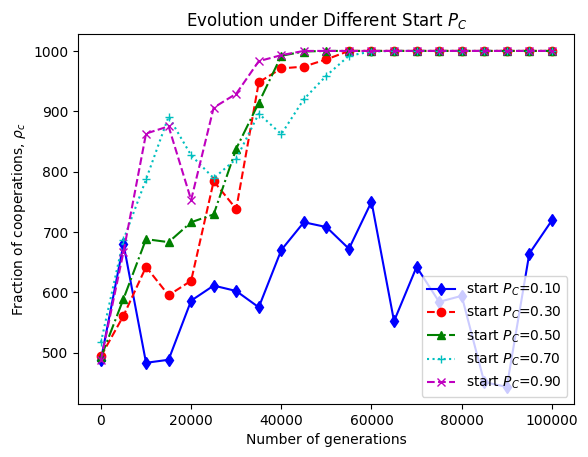

<Figure size 640x480 with 0 Axes>

In [ ]:
repeat_start_pc()

In [ ]:
#lattice()
# cora()
# once()
# once_co()
# repeat2d()
# repeat_ss_rewire()
# repeat_ll_rewire()

# import cProfile
# import pstats
#
# cProfile.run("repeat_ss_rewire()", "timeit")
# p = pstats.Stats('timeit')
# p.sort_stats('time')
# p.print_stats(20)

KeyError: 0

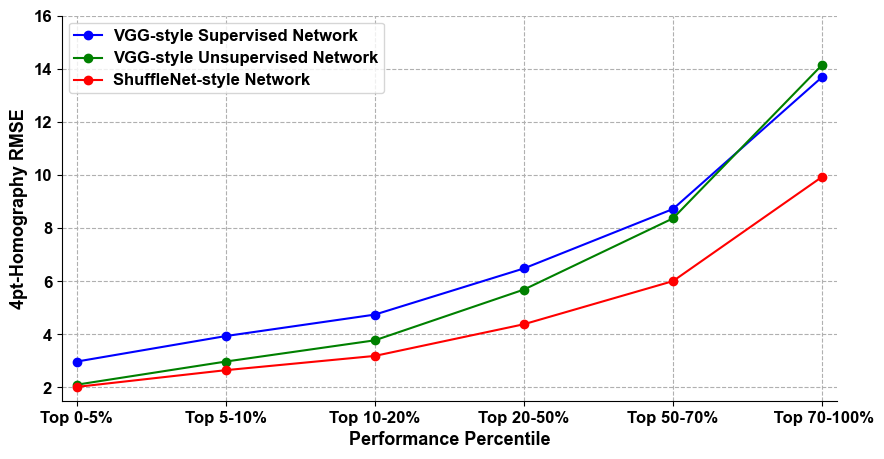

In [ ]:
# coding=utf-8

import numpy as np
import matplotlib.pyplot as plt

plt.rcParams['font.sans-serif'] = ['Arial']  # 如果要显示中文字体,则在此处设为：SimHei
plt.rcParams['axes.unicode_minus'] = False  # 显示负号

x = np.array([1, 2, 3, 4, 5, 6])
VGG_supervised = np.array([2.9749694, 3.9357018, 4.7440844, 6.482254, 8.720203, 13.687582])
VGG_unsupervised = np.array([2.1044724, 2.9757383, 3.7754183, 5.686206, 8.367847, 14.144531])
ourNetwork = np.array([2.0205495, 2.6509762, 3.1876223, 4.380781, 6.004548, 9.9298])

# label在图示(legend)中显示。若为数学公式,则最好在字符串前后添加"$"符号
# color：b:blue、g:green、r:red、c:cyan、m:magenta、y:yellow、k:black、w:white、、、
# 线型：-  --   -.  :    ,
# marker：.  ,   o   v    <    *    +    1
plt.figure(figsize=(10, 5))
plt.grid(linestyle="--")  # 设置背景网格线为虚线
ax = plt.gca()
ax.spines['top'].set_visible(False)  # 去掉上边框
ax.spines['right'].set_visible(False)  # 去掉右边框


plt.plot(x, VGG_supervised, marker='o', color="blue", label="VGG-style Supervised Network", linewidth=1.5)
plt.plot(x, VGG_unsupervised, marker='o', color="green", label="VGG-style Unsupervised Network", linewidth=1.5)
plt.plot(x, ourNetwork, marker='o', color="red", label="ShuffleNet-style Network", linewidth=1.5)

group_labels = ['Top 0-5%', 'Top 5-10%', 'Top 10-20%', 'Top 20-50%', 'Top 50-70%', ' Top 70-100%']  # x轴刻度的标识
plt.xticks(x, group_labels, fontsize=12, fontweight='bold')  # 默认字体大小为10
plt.yticks(fontsize=12, fontweight='bold')
# plt.title("example", fontsize=12, fontweight='bold')  # 默认字体大小为12
plt.xlabel("Performance Percentile", fontsize=13, fontweight='bold')
plt.ylabel("4pt-Homography RMSE", fontsize=13, fontweight='bold')
plt.xlim(0.9, 6.1)  # 设置x轴的范围
plt.ylim(1.5, 16)

# plt.legend()          #显示各曲线的图例
plt.legend(loc=0, numpoints=1)
leg = plt.gca().get_legend()
ltext = leg.get_texts()
plt.setp(ltext, fontsize=12, fontweight='bold')  # 设置图例字体的大小和粗细

plt.savefig('./filename.svg', format='svg')  # 建议保存为svg格式,再用inkscape转为矢量图emf后插入word中
plt.show()

